In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper
import util.trading_systems as ts

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [34]:
with open('all_price2.pickle','rb') as f:
    results = pickle.load(f)

In [35]:
len(results)

2115

In [36]:
results['Abyssal_whip'].keys()

dict_keys(['endMAE', 'startLoss', 'opt_params', 'perfect', 'momentum_model', 'model_opt', 'sma', 'testPrices', 'buyAndHold', 'numPrices', 'item', 'startMAE', 'numEpochs', 'budget', 'model', 'stochOscil_model', 'stochOscil', 'opt_days', 'predictions', 'persist', 'sma_model', 'momentum', 'model_days', 'endLoss'])

In [37]:
modelProfs = [(item,results[item]['model_days']) for item in results]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [38]:
pprint(modelProfs[0:10])

[('Empty_sack', 431.0),
 ('Ring_mould', 157.88235294117655),
 ('Air_tiara', 115.25933609958506),
 ('Jangerberry_seed', 69.7897435897436),
 ('Empty_fishbowl', 62.47826086956523),
 ('Basket', 59.71951219512196),
 ('Iron_dagger', 58.15277777777778),
 ('Shortbow_(u)', 52.795918367346935),
 ('Shears', 35.78023212280045),
 ('Cadavaberry_seed', 30.844221105527637)]


In [39]:
modVSpers = [(item,results[item]['model_days']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model_days']-results[item]['buyAndHold']) for item in results ]
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)

In [54]:
pprint(modVSpers[0:10])

[('Empty_sack', 430.85714285714283),
 ('Air_tiara', 109.00414937759335),
 ('Ring_mould', 84.5588235294118),
 ('Jangerberry_seed', 69.71282051282051),
 ('Empty_fishbowl', 63.09239130434784),
 ('Basket', 60.63617886178862),
 ('Shortbow_(u)', 52.62244897959183),
 ('Iron_dagger', 48.11226851851852),
 ('Cadavaberry_seed', 31.804020100502512),
 ('Dwellberry_seed', 29.939393939393938)]


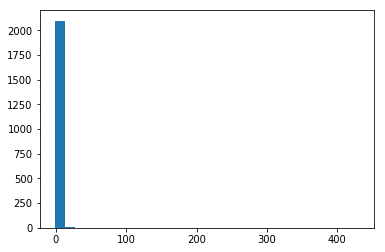

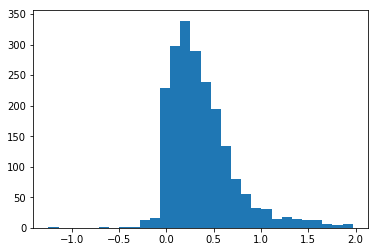

In [42]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-2 and a[1]<2],30)
plt.show()

In [44]:
modVSperf = [(item,results[item]['model_days']-results[item]['perfect']) for item in results ]
modVSperf = sorted(modVSperf, key=lambda x: x[1], reverse=True)

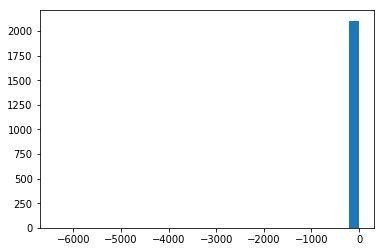

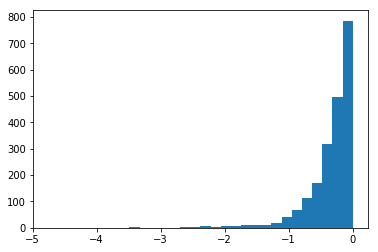

In [45]:
plt.hist([a[1] for a in modVSperf],30)
plt.show()
plt.hist([a[1] for a in modVSperf if a[1]>-6 and a[1]<.6],30)
plt.show()

In [46]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])
numProfmodVSperf = len([a for a in modVSperf if a[1]>0])

In [47]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))
print(numProfmodVSperf/len(results))

2115
0.9475177304964539
0.9078014184397163
0.9295508274231679
0.00047281323877068556


In [48]:
buyDays = [results[item]['opt_days'][0] for item in results]
sellDays = [results[item]['opt_days'][0] for item in results]

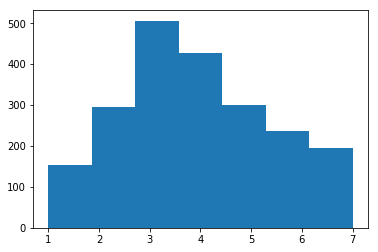

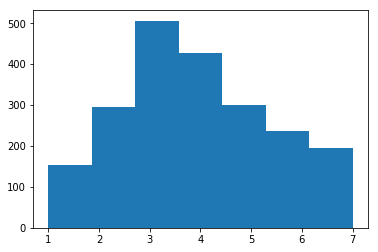

In [52]:
plt.hist(buyDays,7)
plt.show()
plt.hist(sellDays,7)
plt.show()

In [55]:
actualModProfs = [(item,results[item]['testPrices'][-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

In [56]:
pprint(actualModProfs[:10])

[('Mind_talisman', 7.222222486847464),
 ('Shears', 4.656248328608868),
 ('Vampyre_dust', 4.391509575264792),
 ('Leaping_sturgeon', 3.8630306786488995),
 ('Wool', 3.0172489953862183),
 ('Coconut', 2.747742393098307),
 ('Raw_sardine', 2.4591848533025016),
 ('Shantay_pass', 2.3963082643530607),
 ('Bronze_chainbody', 2.282261741906065),
 ('Loar_remains', 2.2515680392691575)]
